In [1]:
import numpy as np
import os

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

from astropy.io import fits

from scipy.optimize import curve_fit

obs_date='ut20170828'
obj_name='Hats8'       

path='/Volumes/ermay_ext/Magellan/FourStar_TestData/'
phot_path=path+'Phot/'
SAVEPATH=path+'SaveData/'


# IDENTIFY LOCATION OF TARGET #
# --------------------------------------- #
#### press space bar to mark the target ###


In [2]:
file_name='zfsr_2MASSJ23_01_c2.fits.gz'
obj='TARGET'  #TARGET for planet host, a number >0 for others
chip=2

sw=50  #initial size zoom in
ap=5.0 #aperature size

data=(fits.open(phot_path+file_name))[0].data
coords=[]

##########
def onclick_1(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print 'x = %d, y = %d'%(ix, iy)

    global coords
    coords.append((ix, iy))

    if len(coords) == 1:
        fig.canvas.mpl_disconnect(cid)
        plt.close(101)

<IPython.core.display.Javascript object>


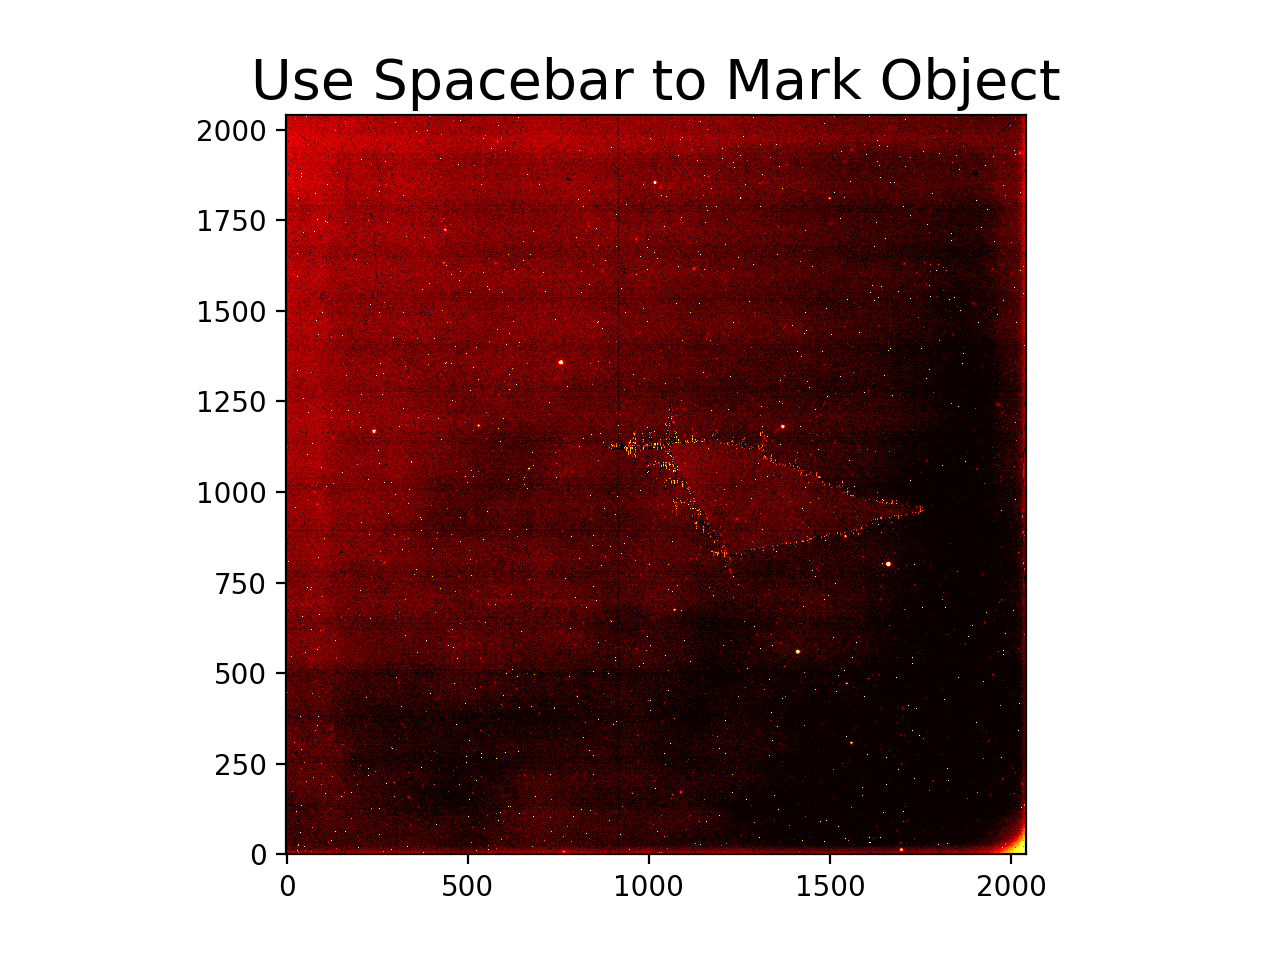

In [3]:
####################
fig=plt.figure(101)
ax=fig.add_subplot(111)

ax.imshow(data,cmap=plt.cm.hot,vmin=np.nanmedian(data)*0.98,vmax=np.nanmedian(data)*1.2)
plt.ylim(0,data.shape[1])
plt.title('Use Spacebar to Mark Object', fontsize=20)

#fig.canvas.callbacks.connect('pick_event', on_pick)
cid=fig.canvas.mpl_connect('key_press_event', onclick_1)

plt.show(block=False)

In [5]:
if obj=='TARGET':
    np.savez(SAVEPATH+'LOCATION_TARGET.npz',coords=coords,chip=chip)
else:
    np.savez(SAVEPATH+'LOCATION_'+str(int(obj))+'npz',coords=coords,chip=chip)

In [ ]:
from Extract_Data import Extract_Data
    
%matplotlib inline            
Extract_Data(phot_path,SAVEPATH,1,3,5,True)      

NUMBER OF EXPOSURES:  1
